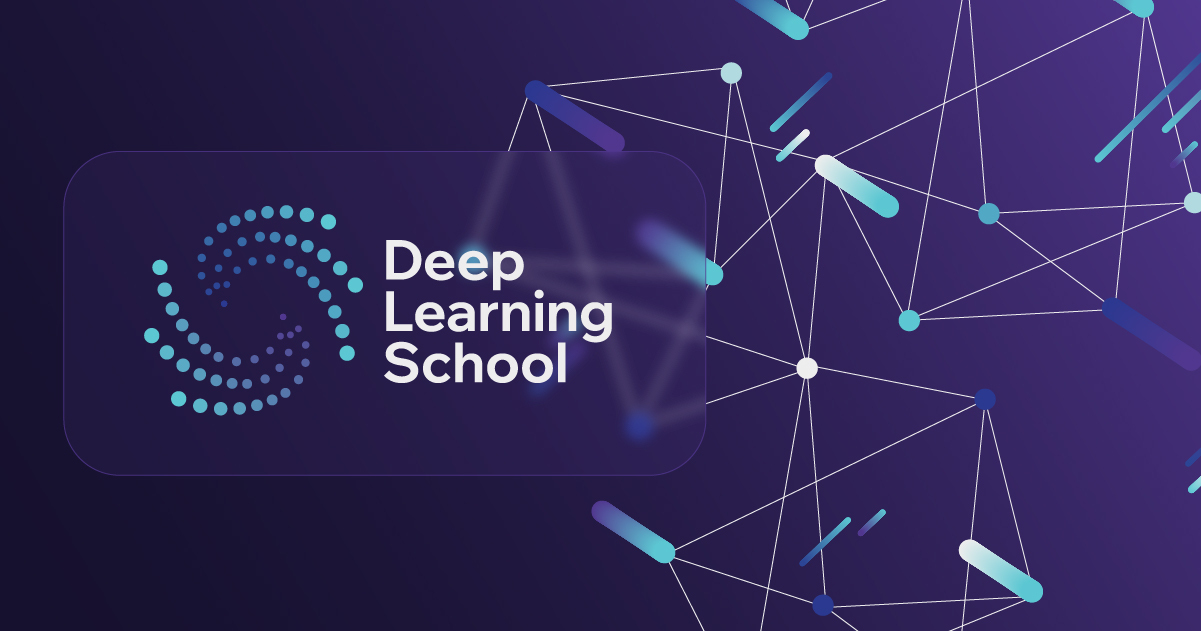

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

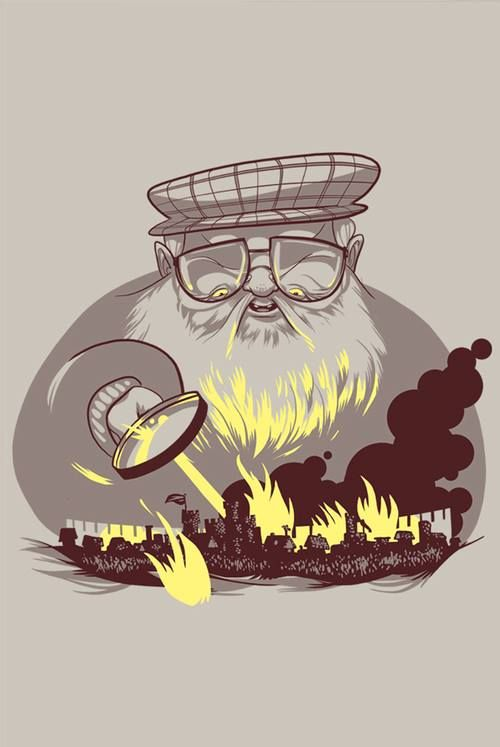

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 3.74MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data['age'].fillna(data['age'].median(), inplace=True)
data['mother'].fillna('Unknown', inplace=True)
data['father'].fillna('Unknown', inplace=True)
data['heir'].fillna('Unknown', inplace=True)
data['spouse'].fillna('Unknown', inplace=True)
data['title'].fillna(data['title'].mode()[0], inplace=True)
data['culture'].fillna('Unknown', inplace=True)
data['house'].fillna('Unknown', inplace=True)
data['isAliveMother'].fillna('Unknown', inplace=True)
data['isAliveFather'].fillna('Unknown', inplace=True)
data['isAliveSpouse'].fillna('Unknown', inplace=True)
data['isAliveHeir'].fillna('Unknown', inplace=True)




<ipython-input-5-b241bad63433>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-5-b241bad63433>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(value):
    for key, values in cult.items():
        if value.lower() in values:
            return key
    return value

data['culture'] = data['culture'].apply(simplify_culture)

data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Unknown,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,Unknown,...,0.0,Unknown,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Unknown,Unknown,Unknown,House Frey,Perra Royce,...,Unknown,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Unknown,NaN,Unknown,Unknown,Unknown,House Swyft,Unknown,...,Unknown,Unknown,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Unknown,82.0,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,...,Unknown,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,...,Unknown,1.0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=['title','name','dateOfBirth','mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'popularity', 'numDeadRelations', 'house'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

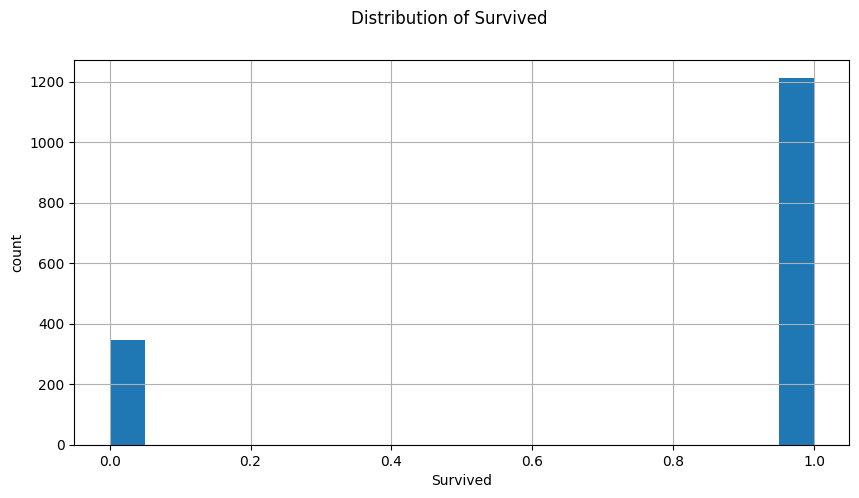

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()



**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,1,Unknown,0,0,0,0,0,0,0,24.0,0,1,1
2,1,Rivermen,1,1,1,1,1,1,1,97.0,1,1,1
3,1,Unknown,0,0,0,1,0,0,1,24.0,1,0,0
4,0,Unknown,0,0,0,0,0,1,1,23.0,0,0,0
5,0,Dornish,0,0,0,1,0,1,1,29.0,1,0,0


In [ ]:
# title_counts = data['title'].value_counts()
# rare_titles = title_counts[title_counts < 5].index
# data['title'] = data['title'].apply(lambda x: 'Rare' if x in rare_titles else x)

# target_mean = data.groupby('title')['isAlive'].mean()
# data['title_target_encoded'] = data['title'].map(target_mean)
# data.drop('title', axis=1, inplace=True)

# data.head()

In [ ]:
# Посмотрим количество уникальных значений в столбце 'culture'
unique_count = data['culture'].nunique()

print(f"Количество уникальных значений в столбце 'culture': {unique_count}")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['culture_encoded'] = le.fit_transform(data['culture'])
data.drop('culture', axis=1, inplace=True)


data.head()

Количество уникальных значений в столбце 'culture': 35


,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded
S.No,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,24.0,0,1,1,27
2,1,1,1,1,1,1,1,1,97.0,1,1,1,22
3,1,0,0,0,1,0,0,1,24.0,1,0,0,27
4,0,0,0,0,0,0,1,1,23.0,0,0,0,27
5,0,0,0,0,1,0,1,1,29.0,1,0,0,4


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

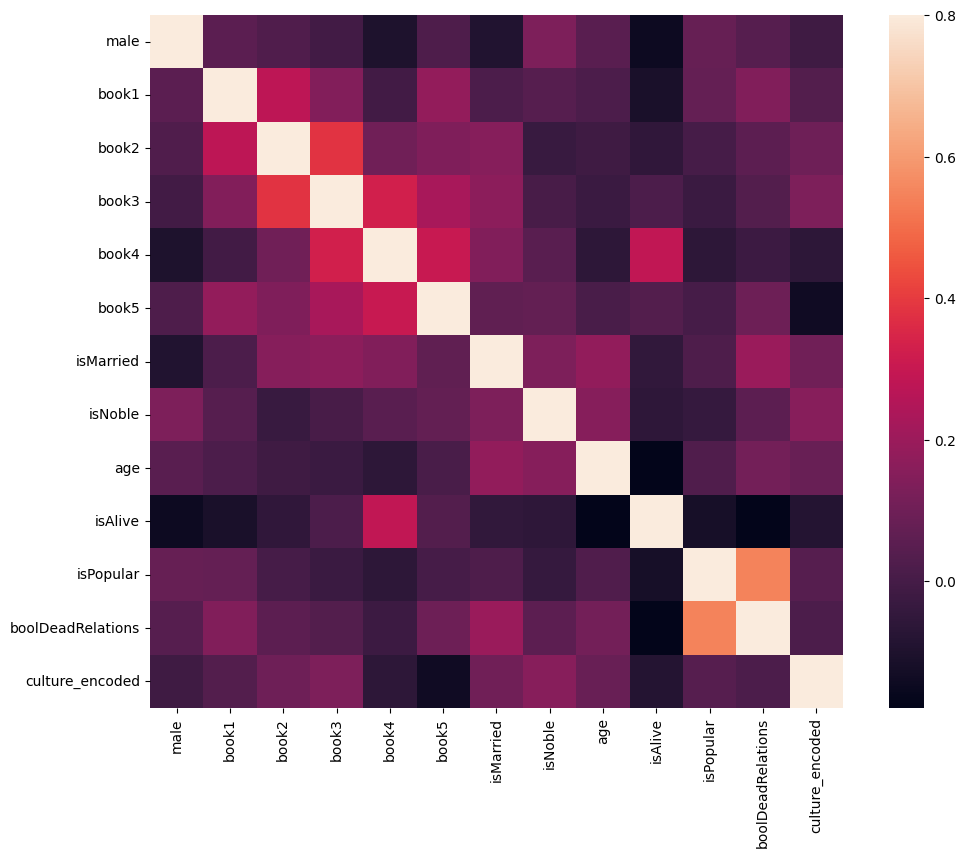

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


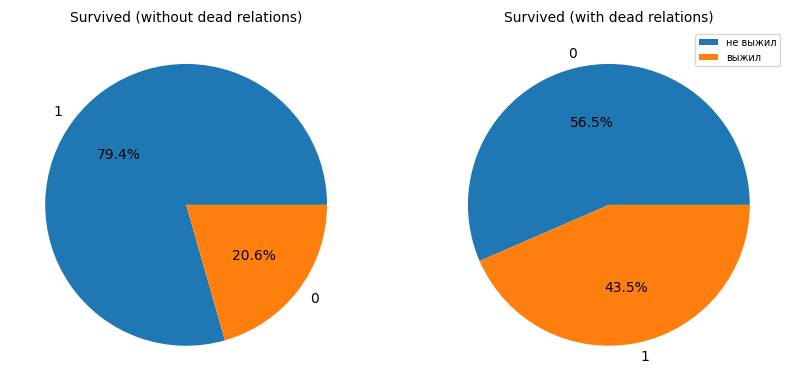

In [ ]:

data_1 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()
data_2 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (without dead relations)', fontsize=10)
ax2.set_title('Survived (with dead relations)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

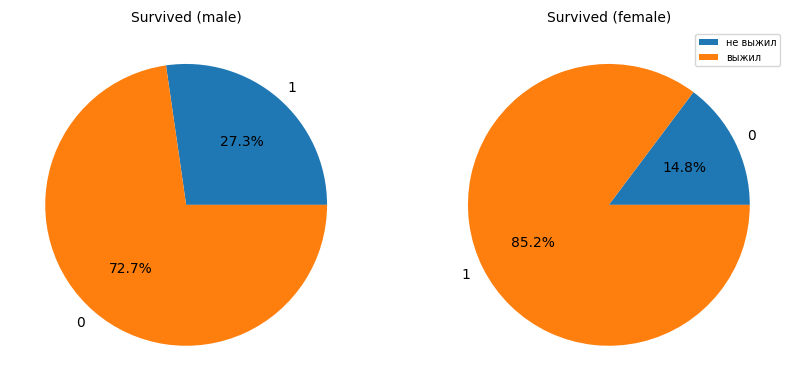

In [ ]:
data1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

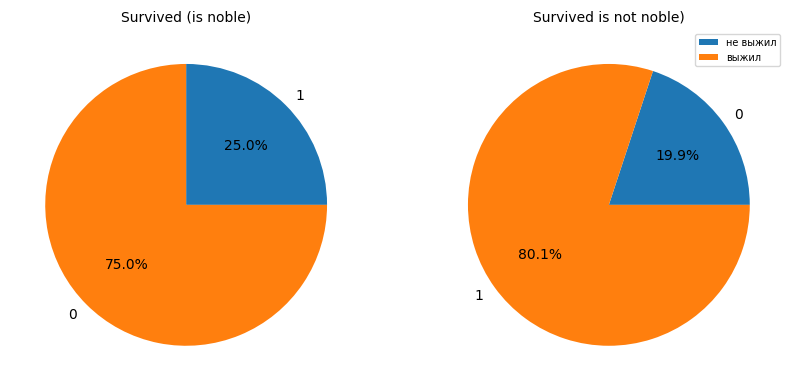

In [ ]:
data1 = data[data['isNoble']== 1]['isAlive'].value_counts().sort_values()
data2 = data[data['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (is noble)', fontsize=10)
ax2.set_title('Survived is not noble)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

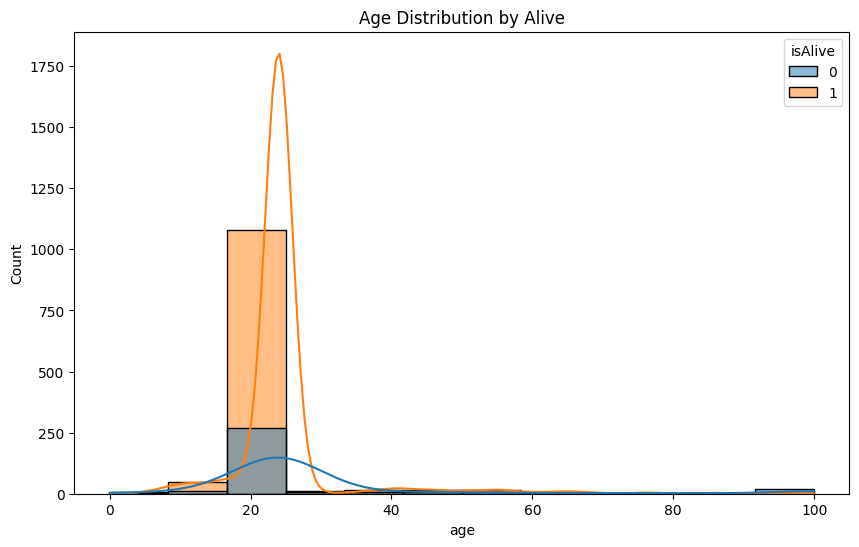

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Alive')
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=data, x='title_target_encoded', kde=True, hue='isAlive')
# plt.title('Age Distribution by Alive')
# plt.show()

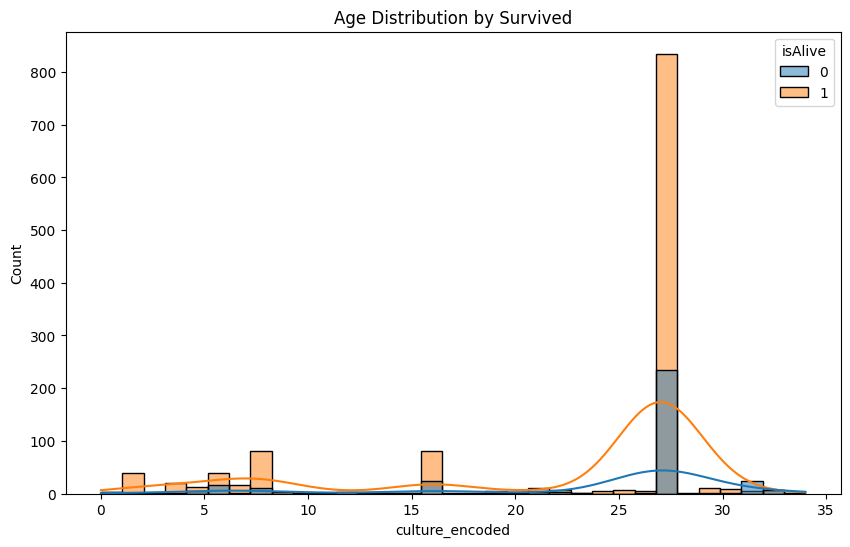

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='culture_encoded', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
plt.show()

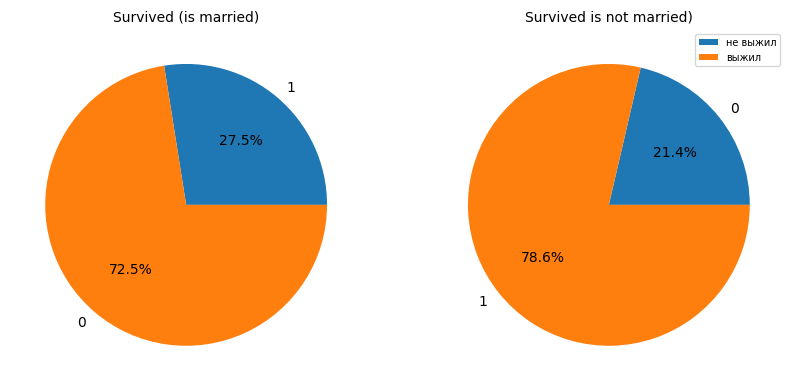

In [ ]:
data1 = data[data['isMarried']== 1]['isAlive'].value_counts().sort_values()
data2 = data[data['isMarried']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (is married)', fontsize=10)
ax2.set_title('Survived is not married)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Масштабирование обучающих данных
X_test_scaled = scaler.transform(X_test)       # Масштабирование тестовых данных с использованием параметров обучающих



## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Определяем модели и их параметры для GridSearchCV
models = {
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': [None, 'balanced']
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'class_weight': [None, 'balanced']
    }),
    "Gaussian Process": (GaussianProcessClassifier(random_state=42), {
        'kernel': [1.0 * RBF(1.0), 1.0 * RBF(0.5)],
        'max_iter_predict': [100, 200]
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance']
    }),
    "SVC": (SVC(random_state=42), {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'class_weight': [None, 'balanced']
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'class_weight': [None, 'balanced']
    })
}

# Обучаем модели и находим лучшие параметры
best_models = {}
predictions = {}  # Словарь для сохранения предсказаний

for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Сохраняем предсказания для каждой модели
    predictions[name] = best_models[name].predict(X_test_scaled)

# Шаг 1. создание модели
# ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# random_forest = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
# gaussian_process = GaussianProcessClassifier(kernel=RBF(), max_iter_predict=200, random_state=42)
# gaussian_nb = GaussianNB()
# knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
# svc = SVC(C=10.0, kernel='linear', class_weight='balanced', random_state=42)
# decision_tree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# # Шаг 2. обучение модели
# ada_boost.fit(X_train_scaled, y_train)
# random_forest.fit(X_train_scaled, y_train)
# gaussian_process.fit(X_train_scaled, y_train)
# gaussian_nb.fit(X_train_scaled, y_train)
# knn.fit(X_train_scaled, y_train)
# svc.fit(X_train_scaled, y_train)
# decision_tree.fit(X_train_scaled, y_train)

# # Шаг 3. Предсказание на тестовых данных
# y_pred_1 = ada_boost.predict(X_test_scaled)
# y_pred_2 = random_forest.predict(X_test_scaled)
# y_pred_3 = gaussian_process.predict(X_test_scaled)
# y_pred_4 = gaussian_nb.predict(X_test_scaled)
# y_pred_5 = knn.predict(X_test_scaled)
# y_pred_6 = svc.predict(X_test_scaled)
# y_pred_7 = decision_tree.predict(X_test_scaled)


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 1.0, 'class_weight': None, 'solver': 'liblinear'}
Training AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Training Random Forest...
Best parameters for Random Forest: {'class_weight': None, 'max_depth': 10, 'n_estimators': 300}
Training Gaussian Process...
Best parameters for Gaussian Process: {'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 100}
Training KNN...
Best parameters for KNN: {'n_neighbors': 10, 'weights': 'uniform'}
Training SVC...
Best parameters for SVC: {'C': 1.0, 'class_weight': None, 'kernel': 'rbf'}
Training Decision Tree...
Best parameters for Decision Tree: {'class_weight': None, 'max_depth': 10}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# # Шаг 3. Предсказание на тестовых данных
# y_pred = logistic_regression.predict(X_test_scaled)

# # Шаг 4. Оценка предсказания по метрике accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
from sklearn.metrics import accuracy_score

# Вычисляем accuracy для каждой модели
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.4f}")

Accuracy for Logistic Regression: 0.8141
Accuracy for AdaBoost: 0.8365
Accuracy for Random Forest: 0.8365
Accuracy for Gaussian Process: 0.8301
Accuracy for KNN: 0.7885
Accuracy for SVC: 0.8173
Accuracy for Decision Tree: 0.8237


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.69MB/s]


In [ ]:
dataa = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")

dataa['age'].fillna(data['age'].median(), inplace=True)
dataa['mother'].fillna('Unknown', inplace=True)
dataa['father'].fillna('Unknown', inplace=True)
dataa['heir'].fillna('Unknown', inplace=True)
dataa['spouse'].fillna('Unknown', inplace=True)
dataa['culture'].fillna('Unknown', inplace=True)
dataa['house'].fillna('Unknown', inplace=True)
dataa['isAliveMother'].fillna('Unknown', inplace=True)
dataa['isAliveFather'].fillna('Unknown', inplace=True)
dataa['isAliveSpouse'].fillna('Unknown', inplace=True)
dataa['isAliveHeir'].fillna('Unknown', inplace=True)




<ipython-input-106-631efc88eec6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataa['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-106-631efc88eec6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
dataa['isPopular'] = dataa['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

dataa['boolDeadRelations'] = dataa['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(value):
    for key, values in cult.items():
        if value.lower() in values:
            return key
    return value

dataa['culture'] = dataa['culture'].apply(simplify_culture)

dataa.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,Unknown,156.0,Unknown,Unknown,Unknown,House Blackwood,Unknown,...,Unknown,Unknown,Unknown,0,0,100.0,0,0.050167,0,0
1559,Melisandre,NaN,0,Asshai,NaN,Unknown,Unknown,Unknown,R'hllor,Unknown,...,Unknown,Unknown,Unknown,0,0,24.0,0,0.745819,1,0
1560,Merrit,NaN,0,Unknown,NaN,Unknown,Unknown,Unknown,Brotherhood without banners,Unknown,...,Unknown,Unknown,Unknown,0,0,24.0,0,0.010033,0,0
1561,Meryn Trant,Ser,1,Unknown,NaN,Unknown,Unknown,Unknown,House Trant,Unknown,...,Unknown,Unknown,Unknown,0,1,24.0,0,0.220736,0,0
1562,Merrett Frey,NaN,1,Riverlands,262.0,Unknown,Unknown,Unknown,House Frey,Mariya Darry,...,Unknown,Unknown,1.0,1,0,38.0,0,0.434783,0,0


In [ ]:
dataa.drop(columns=['title','name','dateOfBirth','mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'popularity', 'numDeadRelations', 'house'], inplace = True)

In [ ]:
unique_count = dataa['culture'].nunique()

print(f"Количество уникальных значений в столбце 'culture': {unique_count}")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataa['culture_encoded'] = le.fit_transform(dataa['culture'])
dataa.drop('culture', axis=1, inplace=True)


dataa.head()

Количество уникальных значений в столбце 'culture': 37


,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isPopular,boolDeadRelations,culture_encoded
S.No,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,100.0,0,0,30
1559,0,0,1,1,1,1,0,0,24.0,1,0,0
1560,0,0,0,1,1,0,0,0,24.0,0,0,30
1561,1,1,1,1,1,1,0,1,24.0,0,0,30
1562,1,1,1,1,1,1,1,0,38.0,0,0,25


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')



best_model_name = "AdaBoost"
best_model = best_models[best_model_name]

X_test_processed = scaler.transform(dataa)

y_pred = best_model.predict(X_test_processed)

submission['isAlive'] = y_pred





/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

In [1]:
from google.colab import files

# Скачайте файл new_submission.csv
files.download("/content/new_submission.csv")

FileNotFoundError: Cannot find file: /content/new_submission.csv